In [10]:
#imported necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import pairwise_distances


In [11]:
# Load the preprocessed dataset 
df = pd.read_csv(r"..\API\data\raw\train_data.csv")

print(df.info())  
print(df.describe()) 
print(df.head())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [12]:
print("\nDistribution of classes:")
class_counts = df['class'].value_counts()
print(class_counts)
print(f"Class Balance: {class_counts.values[0]/class_counts.values[1]:.2f}:1")


Distribution of classes:
class
normal     13449
anomaly    11743
Name: count, dtype: int64
Class Balance: 1.15:1


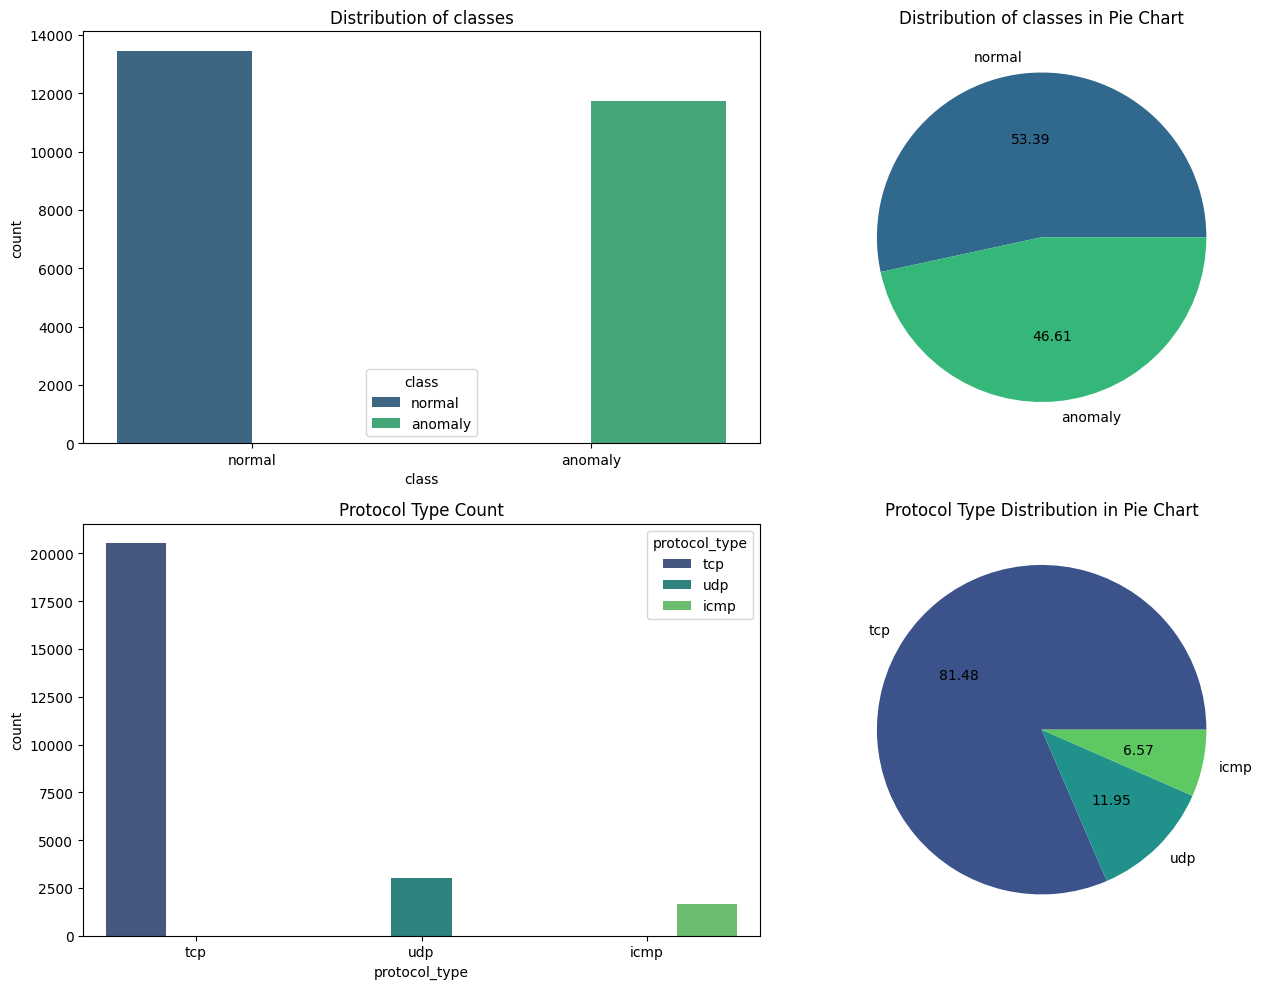

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Create a 2x2 grid 


palette = "viridis"

# Pie chart of class distribution
label = df['class'].value_counts().index
color = sns.color_palette(palette, n_colors=2)
axes[0, 1].pie(df['class'].value_counts(), labels=label, autopct="%0.2f", colors=color)
axes[0, 1].set_title("Distribution of classes in Pie Chart")

#Bar chart of class distribution
sns.countplot(ax=axes[0, 0], x=df['class'], hue=df['class'], palette=palette)
axes[0, 0].set_title("Distribution of classes")

#Pie chart of protocol type
label=df['protocol_type'].value_counts().index
color = sns.color_palette(palette, n_colors=3)
axes[1, 1].pie(df['protocol_type'].value_counts(),labels = label , autopct="%0.2f", colors=color)
axes[1, 1].set_title("Protocol Type Distribution in Pie Chart")

#Bar chart of protocol type
sns.countplot(ax=axes[1, 0], x=df['protocol_type'], hue=df['protocol_type'], palette=palette)
axes[1, 0].set_title("Protocol Type Count")

plt.tight_layout()
plt.show()


In [15]:
np.unique(df['service'])

array(['IRC', 'X11', 'Z39_50', 'auth', 'bgp', 'courier', 'csnet_ns',
       'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i',
       'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher',
       'hostnames', 'http', 'http_443', 'http_8001', 'imap4', 'iso_tsap',
       'klogin', 'kshell', 'ldap', 'link', 'login', 'mtp', 'name',
       'netbios_dgm', 'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp',
       'nntp', 'ntp_u', 'other', 'pm_dump', 'pop_2', 'pop_3', 'printer',
       'private', 'red_i', 'remote_job', 'rje', 'shell', 'smtp',
       'sql_net', 'ssh', 'sunrpc', 'supdup', 'systat', 'telnet', 'tim_i',
       'time', 'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois'],
      dtype=object)

In [1]:
import joblib

with open(r'd:\Save Files\Visual Studio\Network_intrusion\API\model\saved_models\service_encoder.pkl', 'rb') as service_encoder_file:
    service_encoder = joblib.load(service_encoder_file)  # Use joblib.load

with open(r'd:\Save Files\Visual Studio\Network_intrusion\API\model\saved_models\flag_encoder.pkl', 'rb') as flag_encoder_file:
    flag_encoder = joblib.load(flag_encoder_file)

c:\Users\Luv Valecha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.4.2 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [2]:
service_encoder.classes_

array(['IRC', 'X11', 'Z39_50', 'auth', 'bgp', 'courier', 'csnet_ns',
       'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i',
       'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher',
       'hostnames', 'http', 'http_443', 'http_8001', 'imap4', 'iso_tsap',
       'klogin', 'kshell', 'ldap', 'link', 'login', 'mtp', 'name',
       'netbios_dgm', 'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp',
       'nntp', 'ntp_u', 'other', 'pm_dump', 'pop_2', 'pop_3', 'printer',
       'private', 'red_i', 'remote_job', 'rje', 'shell', 'smtp',
       'sql_net', 'ssh', 'sunrpc', 'supdup', 'systat', 'telnet', 'tim_i',
       'time', 'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois'],
      dtype=object)

In [3]:
flag_encoder.classes_

array(['OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3',
       'SF', 'SH'], dtype=object)